# LinearRegression을 이용한 보스턴 주택 가격 예측

---

이번 포스팅에서는 sklearn에서 제공하는 **LinearRegression 모델을 이용해 보스턴 주택 가격을 예측**하는 예제를 진행합니다.

In [1]:
# 라이브러리 임포트

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [4]:
# boston 데이터 세트 로드

bst = load_boston()

bstDF = pd.DataFrame(bst.data, columns = bst.feature_names)

In [5]:
# boston 데이터 세트의 Target은 주택 가격

bstDF['PRICE'] = bst.target
print('shape : ',bstDF.shape)
bstDF.head()

shape :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# 결측치 확인

bstDF.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Feature Description
---

In [6]:
bstDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

- `CRIM : 지역별 범죄 발생률`


- `ZN : 25,000평방피트를 초과하는 거주 지역 비율`


- `INDUS : 비상업 지역 넓이 비율`


- `CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우 1, 아니면 0)`


- `NOX : 일산화질소 농도`


- `RM : 거주할 수 있는 방 개수`


- `AGE : 5개 주요 고용센터까지의 가중 거리`


- `RAD : 고속도로 접근 용이도`


- `TAX : 10,000 달러 당 재산세율`


- `PTRATIO : 지역의 교사와 학생 수 비율`


- `B : 지역의 흑인 거주 비율`


- `LSTAT : 하위 계층의 비율`


- `MEDV : 본인 소유의 주택 가격(중앙값)`

# EDA
---

['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD'] 피쳐를 이용해 TARGET 피쳐인 **PRICE와의 상관관계**를 확인합니다.

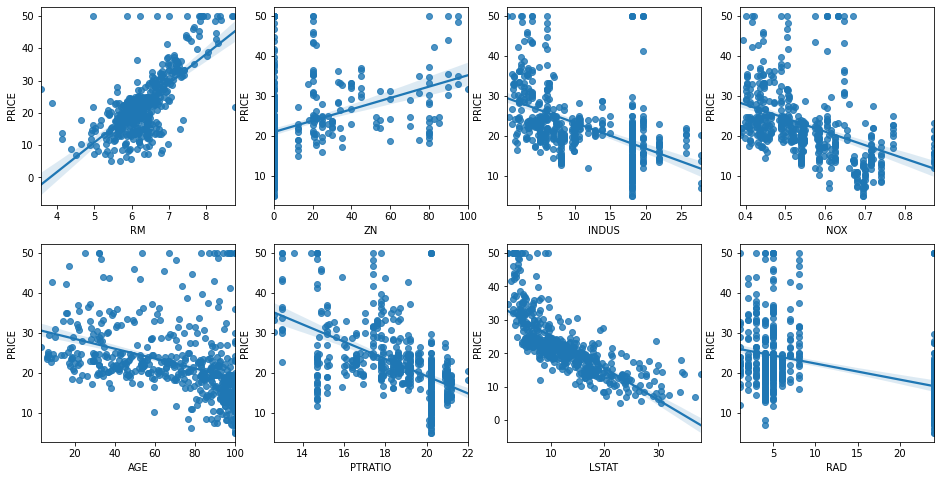

In [21]:
columns = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

fig, axes = plt.subplots(figsize=(16, 8), ncols = 4, nrows = 2)
for i, feature in enumerate(columns):
    row = int(i/4)
    col = i%4
    sns.regplot(data = bstDF, x=feature, y='PRICE', ax=axes[row][col])

위 그래프를 통해 직관적으로 **PRICE와 RM(거주할 수 있는 방 개수)은 양의 상관관계**를 가지고 있고 **PRICE와 LSTAT(하위 계층의 비율)은 음의 상관관계**를 띄는 모습을 확인할 수 있습니다.

여기서 RM(거주할 수 있는 방 개수) 피쳐는 다시 생각하면 방의 개수가 많을수록 평수가 크다는 것을 의미할 것입니다. 따라서 이를 통해 평수와 집값 또한 강한 양의 상관관계를 가질 것이다 라는 가설을 세울 수 있습니다.

# Linear Model
---

In [25]:
# 선형회귀 모델 생성을 위한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 학습에 사용할 데이터 준비
y_target = bstDF['PRICE']
X_data = bstDF.drop(['PRICE'], axis=1, inplace=False)

# train, test 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state = 156)

# 선형회귀 모델 생성
lr_model = LinearRegression()

# 선형회귀 모델 학습
lr_model.fit(X_train, y_train)

LinearRegression()

# 성능평가
---

In [45]:
# X_test를 이용한 예측 값 생성
pred = lr_model.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, pred)

# RMSE 계산
rmse = np.sqrt(mse)

print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))
print('R - squared : {0:.3f}'.format(r2_score(y_test, pred)))

MSE : 17.297
RMSE : 4.159
R - squared : 0.757


# 절편과 회귀계수
---

In [53]:
# 앞서 생성한 예측 모델의 intercept(절편)과 coefficients(회귀계수)를 확인합니다.

print('intercept(절편) :',lr_model.intercept_)
print('coef(회귀계수) : ',np.round(lr_model.coef_, 1))

intercept(절편) : 40.9955951721646
coef(회귀계수) :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [56]:
# 회귀계수를 DF로 변환해 내림차순으로 출력

coeff = pd.Series(data = np.round(lr_model.coef_,1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

위 회귀계수를 통해 **각각의 피쳐에 대한 회귀계수**를 확인할 수 있습니다. 

위 회귀계수를 살펴보면 양의 값으로는 RM 피처가 가장 높고(3.4), NOX 피처의 음수 값이 다른 피처에 비해 너무 큰것을 확인할 수 있습니다. 

# 교차검증
---

아래에서 **cross_val_score를 통해 학습데이터 셋을 5 폴드로 나누어 교차검증**을 진행합니다. 

여기서 중요한 점은 **sklearn의 scoring 함수는 score 값이 클수록 좋은 평가 결과로 평가**한다는 점입니다. 

하지만 **선형 회귀 모델의 평가지표는 값이 클수록 나쁜 모델**이라는 의미이므로 선형 회귀 모델의 평가지표를 sklearn의 scoring 함수에 적용하기 위해선 회귀 평가 지표가 음수로 반환되어야 하는데 이를 위해 **cross_val_score의 파라미터로 scoring = "neg_mean_squared_error"를 지정해 score 값이 음수값이 반환**되도록 지정합니다.

In [61]:
from sklearn.model_selection import cross_val_score

y_target = bstDF['PRICE']
X_data = bstDF.drop(['PRICE'], axis=1, inplace=False)
lr_model = LinearRegression()

# cross_val_score 를 5 폴트로 진행해 MSE를 구하고 이를 기반으로 RMSE 계산
neg_mse_scores = cross_val_score(lr_model, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores) # neg_mean_squared_error는 음수값이므로 RMSE를 구하기 위해선 다시 -1을 곱해주어야 합니다.
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE scores : ', np.round(avg_rmse, 2))

5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE scores :  5.83
